# La gestion des données de la boutique BottleNeck

MISSION: 
- Nettoyer les données et créer un tableau pour les ventes en ligne
- Analyser les ventes en ligne

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import os
os.chdir("C:/Users/majai/Dropbox/DATA ANALYST formation/Project 5/Livrables")

L'importation des données:

In [2]:
erp = pd.read_excel('erp.xlsx')
liaison = pd.read_excel('liaison.xlsx')
web = pd.read_excel('web.xlsx')

C:\Users\majai\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


## 1. Exploration des trois tableaux

## Data *erp* 

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
len(erp)

825

In [5]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [6]:
erp[erp.duplicated()]

,product_id,onsale_web,price,stock_quantity,stock_status


In [7]:
erp[erp.duplicated(subset=["product_id"])]

,product_id,onsale_web,price,stock_quantity,stock_status


Le tableau *erp* a 825 lignes et 5 colonnes, il n'y a pas de valeurs nulles ni de doublons.

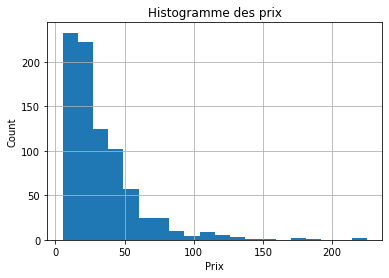

In [8]:
erp["price"].hist(bins=20)
plt.title("Histogramme des prix")
plt.xlabel("Prix")
plt.ylabel("Count")
plt.show()

In [9]:
sum(erp["onsale_web"]==1)

717

In [10]:
sum(erp["onsale_web"]==0)

108

Sur 825 produits, 717 (86.9%) sont vendus en ligne et 108 (13.1%) ne sont pas vendus en ligne.

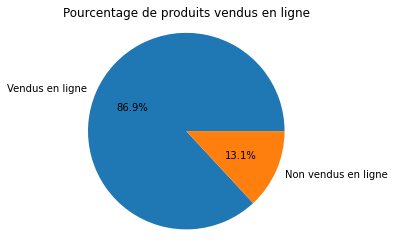

In [11]:
labs = ["Vendus en ligne", "Non vendus en ligne"]
plt.pie(erp["onsale_web"].value_counts(normalize=True), labels=labs, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Pourcentage de produits vendus en ligne")
plt.show()

In [12]:
erp['price'][erp['onsale_web'] == 1].mean(), erp['price'][erp['onsale_web'] == 0].mean()

(32.73654114365413, 30.28518518518519)

In [13]:
import scipy.stats as stats
stats.ttest_ind(erp['price'][erp['onsale_web'] == 1], erp['price'][erp['onsale_web'] == 0])

Ttest_indResult(statistic=0.8861898206819775, pvalue=0.37577411260593163)

Le prix moyen des produits vendus en ligne est de 32.74€ et le prix moyen des produits non vendus en ligne est de 30.29€. 

En utilisant le t-test, je trouve que la différence de prix n'est pas statistiquement significative.

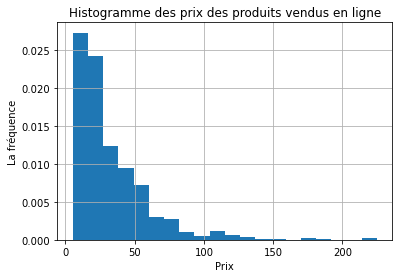

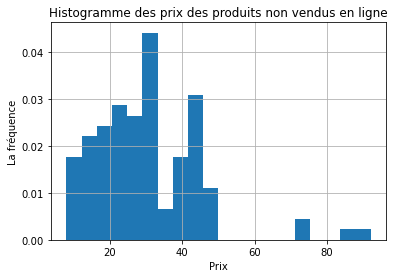

In [14]:
erp[erp["onsale_web"]==1]["price"].hist(density=True, bins=20)
plt.title("Histogramme des prix des produits vendus en ligne")
plt.xlabel("Prix")
plt.ylabel("La fréquence")
plt.show()

erp[erp["onsale_web"]==0]["price"].hist(density=True, bins=20)
plt.title("Histogramme des prix des produits non vendus en ligne")
plt.xlabel("Prix")
plt.ylabel("La fréquence")
plt.show()

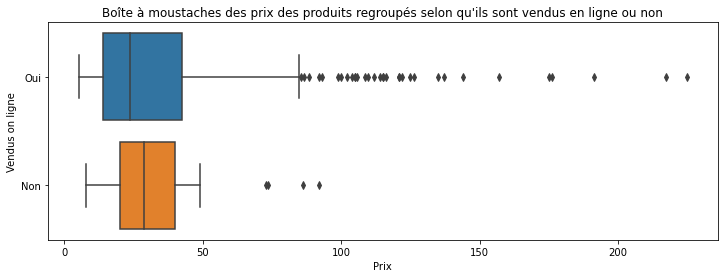

In [15]:
erp["sold_online"] = erp["onsale_web"].replace({0:"Non", 1:"Oui"})

plt.figure(figsize=(12,4))

sns.boxplot(x="price", y="sold_online", orient="h", data=erp)
plt.title("Boîte à moustaches des prix des produits regroupés selon qu'ils sont vendus en ligne ou non")
plt.xlabel("Prix")
plt.ylabel("Vendus on ligne")

plt.show()

Sur les histogrammes et boîtes à moustaches ci-dessus on peut voir que la distribution des prix des produits est différente pour les produits vendus en ligne et les produits non vendus en ligne. Cependant, cette différence n'est pas statistiquement significative.

## Data *liaison*

In [16]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [17]:
len(liaison)

825

In [18]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

In [19]:
liaison[liaison.duplicated()]

,product_id,id_web


In [20]:
liaison = liaison.rename(columns={'id_web': 'sku'})

Le tableau *liaison*, qui sert comme le lien entre *product_id* et *sku*, a 825 lignes et 2 colonnes. Il y a 91 produits qui n'ont pas de *sku*.

Maintenant je vais créer un nouveau tableau en fusionnant *erp* et *liaison*. Puisque je n'ai besoin que d'informations sur les ventes en ligne, je supprimerai les observations où le sku est manquant.

In [21]:
web_wine = pd.merge(erp, liaison, how="left", on="product_id") 

In [22]:
web_wine = web_wine[~web_wine["sku"].isnull()]

In [23]:
web_wine.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sold_online,sku
0,3847,1,24.2,0,outofstock,Oui,15298
1,3849,1,34.3,0,outofstock,Oui,15296
2,3850,1,20.8,0,outofstock,Oui,15300
3,4032,1,14.1,0,outofstock,Oui,19814
4,4039,1,46.0,0,outofstock,Oui,19815


## Data *web*

In [24]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [25]:
len(web)

1513

In [26]:
web.isnull().sum()

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

Le tableau *web* a 1 513 observations et 28 colonnes. Je dois nettoyer ce tableux le fusionner avec le tableux *erp*.

Je peux éliminer les observations avec *sku* manquant.

Je peux éliminer les colonnes où toutes les valeurs sont manquantes (*classe de taxe, post_content, post password, post_content filtered*).

In [27]:
web = web[~web["sku"].isnull()]
web = web.drop(columns=["tax_class", "post_content", "post_password",  "post_content_filtered" ])

In [28]:
web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_parent,menu_order,comment_count
count,1428.0,1428.0,1428.0,1428.0,1428.000000,1428.000000,1428.0,1428.0,1428.0
mean,0.0,0.0,0.0,0.0,4.012605,1.998599,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.515198,0.037411,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,2.000000,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,2.000000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,2.000000,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,2.000000,0.0,0.0,0.0


In [29]:
web["virtual"].unique(), web["downloadable"].unique(), web["rating_count"].unique(), web["average_rating"].unique(), web["post_parent"].unique(), web["menu_order"].unique(), web["comment_count"].unique(),  

(array([0], dtype=int64),
 array([0], dtype=int64),
 array([0], dtype=int64),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]))

Il y a plusieurs colonnes où toutes les valeurs sont égales à zéro - je peux les éliminer.

In [30]:
web = web.drop(columns=["virtual", "downloadable", "rating_count",  "average_rating", "post_parent", "menu_order", "comment_count"])

In [31]:
web[{"sku", "total_sales", "post_author", "post_date", "post_title", "post_name", "post_modified"}].duplicated().sum()

714

In [32]:
web["sku"].value_counts().describe()

count    714.0
mean       2.0
std        0.0
min        2.0
25%        2.0
50%        2.0
75%        2.0
max        2.0
Name: sku, dtype: float64

Chaque *sku* vient exactement deux fois (mean=2, std=0). Seules les différentes colonnes sont *tax_status*, *post_excerpt*, *guid*, *post_type* et *post_mime_type*.

Dans la colonne *guid* il y a des liens vers des sites Web : un vers le produit et un autre vers la pièce jointe (image). 

Lorsque *post_type = "produit"*, *tax_status = "taxable"*. 

Lorsque *post_type = "attachement"*, *tax_status = NaN* et *post_mime_type = "image"*. Toutes les autres valeurs sont ou identiques ou manquantes.

Je vais prendre toutes les colonnes avec des doublons, supprimer les doublons, et créer deux tableaux avec un *sku* unique. 

*web1* contient toutes les données sauf le lien vers *attachment*, et *web2* contient le *sku* et les liens vers *attachment (image)*.


Puis je fusionne deux tableaux.

In [33]:
web1 = web[web["post_type"]=="product"].rename(columns={"guid":"product"})

In [34]:
web2 = web[web["post_type"]=="attachment"]
web2 = web2[{"sku", "guid"}].rename(columns={"guid":"image"})

In [35]:
web_data = pd.merge(web1, web2, how="left", on="sku" ).drop(columns=["post_mime_type", "post_type"])

Enfin, je fusionne les tableux *erp*, *liaison* et *web* pour obtenir *web_wine*, et je ne garde que les produits vendus en ligne.

In [36]:
web_wine = pd.merge(web_wine, web_data, how="inner", on="sku")

In [37]:
web_wine.head();

In [38]:
for col in web_wine.columns:
    print(col)

product_id
onsale_web
price
stock_quantity
stock_status
sold_online
sku
total_sales
tax_status
post_author
post_date
post_date_gmt
post_title
post_excerpt
post_status
comment_status
ping_status
post_name
post_modified
post_modified_gmt
product
image


In [39]:
len(web_wine)

714

*web_wine* est le tableau final avec les données propres et les informations complètes sur les 714 produits vendus en ligne. 

In [40]:
web_wine.head()

,product_id,onsale_web,price,stock_quantity,stock_status,sold_online,sku,total_sales,tax_status,post_author,...,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,product,image
0,3847,1,24.2,0,outofstock,Oui,15298,6.0,taxable,2.0,...,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
1,3849,1,34.3,0,outofstock,Oui,15296,0.0,taxable,2.0,...,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
2,3850,1,20.8,0,outofstock,Oui,15300,0.0,taxable,2.0,...,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
3,4032,1,14.1,0,outofstock,Oui,19814,3.0,taxable,2.0,...,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...
4,4039,1,46.0,0,outofstock,Oui,19815,0.0,taxable,2.0,...,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,https://www.bottle-neck.fr/wp-content/uploads/...


## 2. Analysis

Pour les besoins de l'analyse, je ne prendrai que les colonnes nécessaires de *web_wine*.

In [41]:
data = web_wine.drop(columns=["onsale_web", "sold_online", "tax_status", "post_author", "post_status", "comment_status", "ping_status", "post_date_gmt", "post_modified", "product", "image"])

In [42]:
data.head()

,product_id,price,stock_quantity,stock_status,sku,total_sales,post_date,post_title,post_excerpt,post_name,post_modified_gmt
0,3847,24.2,0,outofstock,15298,6.0,2018-02-08 12:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 08:30:29
1,3849,34.3,0,outofstock,15296,0.0,2018-02-08 13:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 08:00:17
2,3850,20.8,0,outofstock,15300,0.0,2018-02-08 14:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 16:15:03
3,4032,14.1,0,outofstock,19814,3.0,2018-02-09 14:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,2020-01-04 15:36:01
4,4039,46.0,0,outofstock,19815,0.0,2018-02-12 09:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 15:36:10


In [43]:
for col in data.columns:
    print(col)

product_id
price
stock_quantity
stock_status
sku
total_sales
post_date
post_title
post_excerpt
post_name
post_modified_gmt


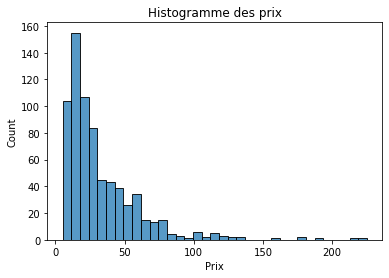

In [44]:
sns.histplot(data=data, x="price")
plt.title("Histogramme des prix")
plt.xlabel("Prix")

plt.show()

In [45]:
data["total_amount"] = data["price"]*data["total_sales"]

In [46]:
data["price"].mean(), data["total_sales"].mean(), data["total_amount"].mean()

(32.49313725490197, 4.012605042016807, 98.83557422969189)

Le prix moyen des produits vendus en ligne est de 32.49€, le nombre moyen de ventes est de 4 par produit, et le revenu moyen est de 98.84€ par produit. 

La liste des 10 produits qui ont généré le plus de CA:

In [47]:
data[["product_id","post_title", "price", "total_sales", "total_amount"]].sort_values(by="total_amount", ascending=False)[0:10]

,product_id,post_title,price,total_sales,total_amount
194,4334,Champagne Gosset Grand Blanc de Blancs,49.0,96.0,4704.0
71,4144,Champagne Gosset Grand Rosé,49.0,87.0,4263.0
218,4402,Cognac Frapin VIP XO,176.0,13.0,2288.0
70,4142,Champagne Gosset Grand Millésime 2006,53.0,30.0,1590.0
69,4141,Champagne Gosset Grande Réserve,39.0,40.0,1560.0
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,1391.5
199,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,1125.0
79,4153,Elian Daros Côtes du Marmandais Clos Baquey 2015,29.0,36.0,1044.0
651,6206,Domaine Giudicelli Patrimonio Blanc 2019,25.2,41.0,1033.2
30,4068,Gilles Robin Crozes-Hermitage Rouge Papillon 2019,16.6,62.0,1029.2


In [48]:
data["post_date"].min()

Timestamp('2018-02-08 12:58:52')

In [49]:
data["total_amount"].sum()

70568.6

In [50]:
data["total_sales"].sum()

2865.0

Depuis février 2018, la boutique **BottleNeck** a vendu 2 865 produits pour une valeur totale de 70 568.60 €.

Je vais créer une fonction *category* qui regroupe les prix en 4 catégories (bas, moyen bas, moyen haut, haut). 

In [51]:
def category(x):
    if x<=20.0:
        return "Bas"
    elif (x>20.0 and x<=50):
        return "Moyen bas"
    elif (x>50.0 and x<=80):
        return "Moyen haut" 
    else:
        return "Haut"

data["category"] = data["price"].apply(category)

In [52]:
price = pd.pivot_table(data, values={"total_sales", "total_amount"}, index="category", aggfunc=np.sum )

In [53]:
price["perc_amount"] = 100*price["total_amount"]/(data["total_amount"].sum())
price["perc_sales"] = 100*price["total_sales"]/(data["total_sales"].sum())
price["price_range"] = [ "<20€", ">80€", "20-50€", "50-80€"]

In [54]:
price

,total_amount,total_sales,perc_amount,perc_sales,price_range
category,,,,,
Bas,18340.5,1558.0,25.989604,54.380454,<20€
Haut,6970.0,45.0,9.876914,1.570681,>80€
Moyen bas,36972.3,1124.0,52.391999,39.232112,20-50€
Moyen haut,8285.8,138.0,11.741483,4.816754,50-80€


Dans le tableau ci-dessus, nous pouvons voir que le vin d'un prix *moyen bas* a généré le plus de CA, tandis que le vin de prix bas a eu le plus grand nombre de ventes.

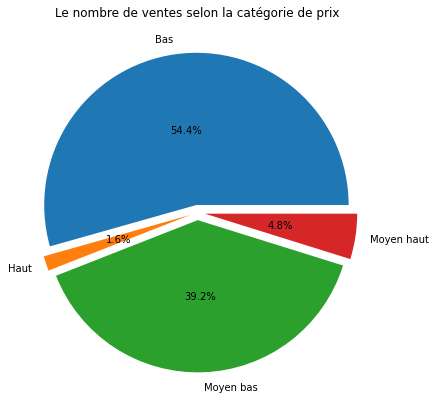

In [55]:
price_group = data.groupby("category")["total_sales"].sum()
pie, ax = plt.subplots(figsize=[7,7])
price_group.plot.pie(autopct="%.1f%%", explode=[0.05]*4, pctdistance=0.5)
plt.title("Le nombre de ventes selon la catégorie de prix")
plt.ylabel("")
plt.show()

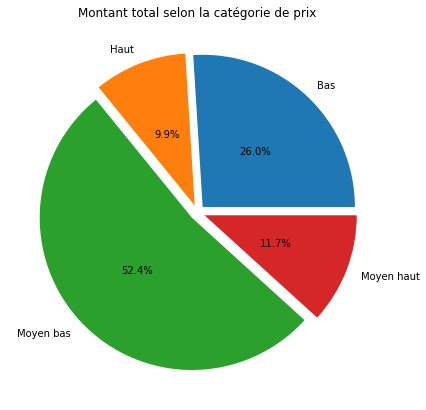

In [56]:
price_group = data.groupby("category")["total_amount"].sum()
pie, ax = plt.subplots(figsize=[7,7])
price_group.plot.pie(autopct="%.1f%%", explode=[0.05]*4, pctdistance=0.5)
plt.title("Montant total selon la catégorie de prix")
plt.ylabel("")
plt.show()

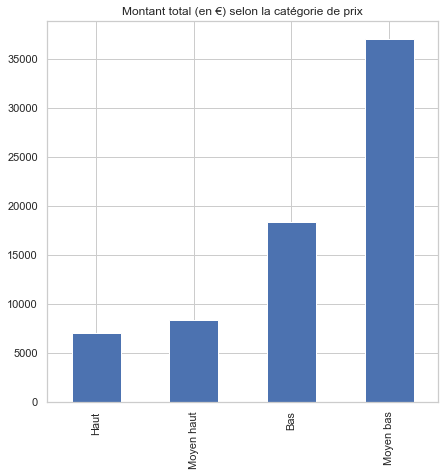

In [57]:
price_group_amount = data.groupby("category")["total_amount"].sum()
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[7,7])
price_group_amount.sort_values().plot.bar()
plt.title("Montant total (en €) selon la catégorie de prix")
plt.xlabel("")
plt.show()

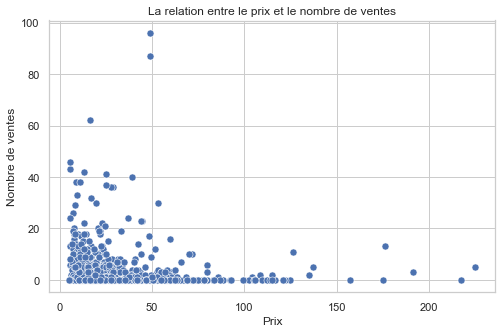

In [58]:
plt.subplots(figsize=[8,5])
sns.scatterplot(data=data, x="price", y="total_sales", s=50)
plt.xlabel("Prix")
plt.ylabel("Nombre de ventes")
plt.title("La relation entre le prix et le nombre de ventes")
plt.show()

In [59]:
print('La corrélation entre le prix et le nombre de ventes est %.3f.' % st.pearsonr(data["price"], data["total_sales"])[0])

La corrélation entre le prix et le nombre de ventes est -0.133.


In [60]:
data["stock_value"] = data["price"]*data["stock_quantity"]

In [61]:
print('La valeur totale de tous les produits vendus en ligne est de %.2f€' % (data["stock_value"].sum() + data["total_amount"].sum()))

La valeur totale de tous les produits vendus en ligne est de 458406.20€


In [62]:
data["quantity"] = data["total_sales"]+data["stock_quantity"]
100*data["total_amount"].sum()/(data["price"]*data["quantity"]).sum()

15.394338034694997

Le chiffre d'affaires total ne représente que 15.4% de la valeur totale de tous les produits mis en vente sur le web.

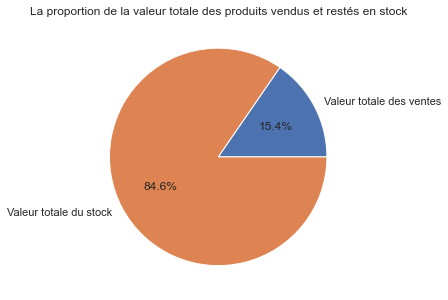

In [63]:
totals = [data["total_amount"].sum(), data["stock_value"].sum()]
labels = ["Valeur totale des ventes", "Valeur totale du stock"]
pie, ax = plt.subplots(figsize=[5,5])
plt.pie(totals, labels=labels, autopct='%.1f%%')
plt.title("La proportion de la valeur totale des produits vendus et restés en stock")
plt.show()

In [64]:
data["total_sales"].sum(), data["quantity"].sum()

(2865.0, 23390.0)

In [65]:
data["total_sales_perc"] = 100*data["total_sales"]/data["quantity"]
100*data["total_sales"].sum()/data["quantity"].sum()

12.248824283882001

Du nombre total de produits mis en vente sur le web (23 390), seuls 12.25% sont vendus (2 865).

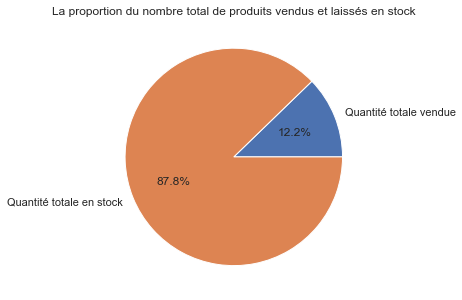

In [66]:
totals = [data["total_sales"].sum(), data["stock_quantity"].sum()]
labels = ["Quantité totale vendue", "Quantité totale en stock"]
pie, ax = plt.subplots(figsize=[5,5])
plt.pie(totals, labels=labels, autopct='%.1f%%')
plt.title("La proportion du nombre total de produits vendus et laissés en stock")
plt.show()

In [67]:
stock = pd.pivot_table(data, values={"total_sales", "stock_quantity", "quantity"}, index="category", aggfunc=np.sum )

In [68]:
stock["perc_onstock"] = 100*stock["stock_quantity"]/(stock["quantity"])
stock["perc_sold"] = 100*stock["total_sales"]/(stock["quantity"])
stock["price_range"] = [ "<20€", ">80€", "20-50€", "50-80€"]
stock

,quantity,stock_quantity,total_sales,perc_onstock,perc_sold,price_range
category,,,,,,
Bas,16063.0,14505,1558.0,90.300691,9.699309,<20€
Haut,308.0,263,45.0,85.389610,14.610390,>80€
Moyen bas,6186.0,5062,1124.0,81.829939,18.170061,20-50€
Moyen haut,833.0,695,138.0,83.433373,16.566627,50-80€


Dans le tableau ci-dessus, on peut voir le pourcentage des produits vendus et restés en stock par catégorie.

### Les valeurs aberrantes (Outliers)

Pour analyser les valeurs aberrantes, je vais calculer les quartiles et définir une valeur aberrante comme la valeur supérieure à Q3 + 1.5 x IQR.

In [69]:
q1 = np.percentile(data["price"], 25)
q2 = np.percentile(data["price"], 50)
q3 = np.percentile(data["price"], 75)
iqr = q3-q1

In [70]:
print("Le premier quartile des prix est de %.2f €, le deuxième quartile ou médiane est de %.2f €, et le troisième quartile est de %.2f €. L'intervalle interquatile est %.2f €." % (q1, q2, q3, iqr))

Le premier quartile des prix est de 14.10 €, le deuxième quartile ou médiane est de 23.55 €, et le troisième quartile est de 42.18 €. L'intervalle interquatile est 28.08 €.


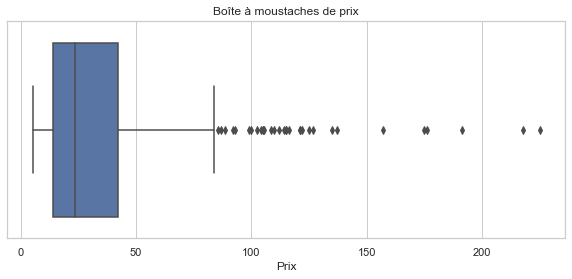

In [93]:
plt.subplots(figsize=[10,4])
sns.boxplot(data=data, x="price")
plt.title("Boîte à moustaches de prix")
plt.xlabel("Prix")
plt.show()

In [72]:
lim = q3 + 1.5*iqr 
print(lim)

84.28750000000001


Tous les prix supérieurs à 84.30€ sont aberrants. Voici la liste :

In [73]:
data[data["price"]> lim][[ "product_id","post_title", "price", "total_sales", "total_amount"]].sort_values(by="price", ascending=False)

,product_id,post_title,price,total_sales,total_amount
199,4352,Champagne Egly-Ouriet Grand Cru Millésimé 2008,225.0,5.0,1125.0
426,5001,David Duband Charmes-Chambertin Grand Cru 2014,217.5,0.0,0.0
587,5892,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,191.3,3.0,573.9
218,4402,Cognac Frapin VIP XO,176.0,13.0,2288.0
553,5767,Camille Giroud Clos de Vougeot 2016,175.0,0.0,0.0
221,4406,Cognac Frapin Château de Fontpinot 1989 20 Ans...,157.0,0.0,0.0
381,4904,Domaine Des Croix Corton Charlemagne Grand Cru...,137.0,5.0,685.0
642,6126,Champagne Gosset Célébris Vintage 2007,135.0,2.0,270.0
201,4355,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,126.5,11.0,1391.5
511,5612,Domaine Weinbach Gewurztraminer Grand Cru Furs...,124.8,0.0,0.0


Les produits avec des prix aberrants sont majoritairement des champagnes, des cognac ou des whiskies.

In [74]:
len(data[data["price"]> lim])

32

In [75]:
data[data["price"]> lim]["price"].mean()

124.571875

In [76]:
data["price"].mean()

32.49313725490197

Il y a 32 valeurs aberrantes et leur prix moyen est de 124.57 €, tandis que la moyenne de l'ensemble est de 32.49 €.

In [77]:
data[data["price"]> lim]["total_amount"].sum()

6970.0

In [78]:
100*data[data["price"]> lim]["total_amount"].sum()/(data["total_amount"].sum())

9.876914094937408

Sur les 32 produits au prix supérieur à 84.30€, seulement 10 produits se vendaient. Par contre, ils généraient un total de 6 970€, ce qui représente presque 10% du CA total. 

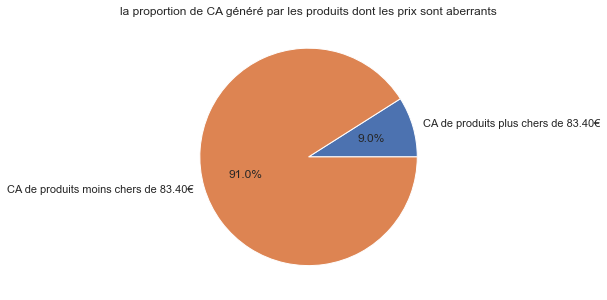

In [79]:
totals =[data[data["price"]> lim]["total_amount"].sum(), data["total_amount"].sum()]
labels = ["CA de produits plus chers de 83.40€", "CA de produits moins chers de 83.40€"]
pie, ax = plt.subplots(figsize=[5,5])
plt.pie(totals, labels=labels, autopct='%.1f%%')
plt.title("la proportion de CA généré par les produits dont les prix sont aberrants")
plt.show()

## 3. Sentiment analysis of *post_excerpt*

Je vais analyser le texte de l'extrait qui décrit le vin, pour voir s'il y a une relation entre le sentiment de l'extrait et les ventes. 

J'aimerais savoir si les gens ont tendance à acheter plus de produits dont la description a un sentiment plus positif.


In [79]:
import tensorflow as tf
assert tf.__version__ >= "2.0"
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from transformers import pipeline

In [80]:
tokenizer = AutoTokenizer.from_pretrained("tblard/tf-allocine", use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("tblard/tf-allocine")
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All model checkpoint layers were used when initializing TFCamembertForSequenceClassification.

All the layers of TFCamembertForSequenceClassification were initialized from the model checkpoint at tblard/tf-allocine.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFCamembertForSequenceClassification for predictions without further training.


In [81]:
web_wine["score"] = web_wine["post_excerpt"].apply(nlp)

In [82]:
#web_wine.to_csv(r'C:\Users\majai\Dropbox\DATA ANALYST formation\Project 5\Livrables\excel\web_wine.csv', index = False, header=True)

In [81]:
wine = pd.read_csv(r'C:\Users\majai\Dropbox\DATA ANALYST formation\Project 5\Livrables\excel\web_wine.csv')

In [82]:
from scipy.stats import pearsonr

In [83]:
data = pd.merge(data, wine[{"product_id", "score"}], on="product_id")

In [85]:
print('Le score de sentiment est compris entre %.3f et %.3f.' % (data["score"].min(), data["score"].max()))
print('Le score de sentiment moyen est %.3f, et le score median est %.3f.' % (data["score"].mean(),data["score"].median()))

Le score de sentiment est compris entre 0.532 et 0.999.
Le score de sentiment moyen est 0.970, et le score median est 0.989.


In [86]:
print(pd.pivot_table(data, values=['score' ], index=['category'],  aggfunc=np.mean).sort_values(by='score'))

               score
category            
Moyen bas   0.967361
Bas         0.969032
Moyen haut  0.978965
Haut        0.981407


La note moyenne de la description du vin est de 0.97, ce qui représente un sentiment très positif.

Les vins à prix élevés ont un sentiment plus positif que les vins moins chers.

In [87]:
pearsonr(data["score"], data["total_amount"])[0]

0.049428574107978615

In [88]:
pearsonr(data["score"], data["total_sales"])[0]

0.01879632012910588

In [89]:
pearsonr(data[data["total_sales_perc"]>0]["score"], data[data["total_sales_perc"]>0]["total_sales_perc"])[0]

0.05385622139441657

La corrélation entre les ventes et le sentiment est positif mais très très faible.

In [90]:
data["price"].max()

225.0

In [91]:
len(data[data["price"]<20])

307

In [92]:
307/714

0.42997198879551823